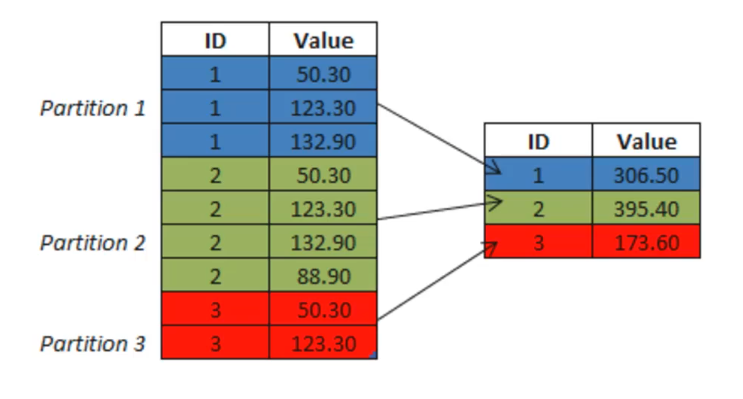

In [1]:
import numpy as np
import pandas as pd

In [4]:
data = {'Company': ['GOOG', 'GOOG', 'MSFT', 'MSFT', 'AAPL', 'AAPL'],
        'Person': ['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
        'Sales': [200, 120, 300, 200, 120, 300]}

In [5]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,300
3,MSFT,Vanessa,200
4,AAPL,Carl,120
5,AAPL,Sarah,300


In [9]:
comp = df.groupby('Company')

In [10]:
comp.sum()

,Person,Sales
Company,,
AAPL,CarlSarah,420
GOOG,SamCharlie,320
MSFT,AmyVanessa,500


In [14]:
df.groupby('Company').sum().loc['AAPL']

Person    CarlSarah
Sales           420
Name: AAPL, dtype: object

In [15]:
df.groupby('Company').max()

,Person,Sales
Company,,
AAPL,Sarah,300
GOOG,Sam,200
MSFT,Vanessa,300


In [17]:
df.groupby('Company').describe()

Sales                                                      
        count   mean         std    min    25%    50%    75%    max
Company                                                            
AAPL      2.0  210.0  127.279221  120.0  165.0  210.0  255.0  300.0
GOOG      2.0  160.0   56.568542  120.0  140.0  160.0  180.0  200.0
MSFT      2.0  250.0   70.710678  200.0  225.0  250.0  275.0  300.0

In [18]:
df.groupby('Company').describe().transpose()

Company            AAPL        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   210.000000  160.000000  250.000000
      std    127.279221   56.568542   70.710678
      min    120.000000  120.000000  200.000000
      25%    165.000000  140.000000  225.000000
      50%    210.000000  160.000000  250.000000
      75%    255.000000  180.000000  275.000000
      max    300.000000  200.000000  300.000000

The `groupby()` function in pandas is a powerful tool used for splitting a DataFrame into groups based on specific criteria, applying functions to those groups, and then combining the results. This operation is often summarized by the "split-apply-combine" strategy, which involves three steps:

1. **Split**: Divide the DataFrame into groups based on some criteria.
2. **Apply**: Perform a function (like aggregation) on each group.
3. **Combine**: Merge the results back into a DataFrame.

### Basic Syntax

The basic syntax for the `groupby()` function is as follows:

```python
DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, dropna=True)
```

- **by**: The column(s) to group by.
- **axis**: Default is 0 (group by rows).
- **as_index**: If True, the group labels will be the index of the resulting DataFrame.
- **sort**: If True, sort the group keys.
- **dropna**: If True, do not include groups with missing values.

### Example 1: Grouping by a Single Column

Consider a DataFrame containing sales data:

```python
import pandas as pd

data = {
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Value': [10, 20, 15, 25, 30]
}
df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum of 'Value'
grouped = df.groupby('Category').sum().reset_index()
print(grouped)
```

**Output:**
```
  Category  Value
0        A     55
1        B     45
```

### Example 2: Grouping by Multiple Columns

You can also group by multiple columns. For instance:

```python
data = {
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Subcategory': ['X', 'Y', 'X', 'Y', 'X'],
    'Value': [10, 20, 15, 25, 30]
}
df = pd.DataFrame(data)

# Group by 'Category' and 'Subcategory' and calculate the mean of 'Value'
grouped = df.groupby(['Category', 'Subcategory']).mean().reset_index()
print(grouped)
```

**Output:**
```
  Category Subcategory  Value
0        A          X   25.0
1        B          Y   22.5
```

### Example 3: Applying Multiple Aggregations

You can apply different aggregation functions to different columns:

```python
data = {
    'Courses': ["Spark", "PySpark", "Hadoop", "Python", "Pandas", "Hadoop", "Spark", "Python"],
    'Fee': [22000, 25000, 23000, 24000, 26000, 25000, 25000, 22000],
    'Duration': ['30days', '50days', '55days', '40days', '60days', '35days', '30days', '50days']
}
df = pd.DataFrame(data)

# Group by 'Courses' and aggregate 'Duration' count and 'Fee' min/max
result = df.groupby('Courses').agg({'Duration': 'count', 'Fee': ['min', 'max']})
print(result)
```

**Output:**
```
          Duration      Fee      
              count    min    max
Courses                            
Hadoop          2      23000  25000
Pandas          1      26000  26000
PySpark         1      25000  25000
Python          2      22000  24000
Spark           2      22000  25000
```

### Conclusion

The `groupby()` function in pandas is essential for data analysis, allowing for efficient grouping and aggregation of data. By mastering its use, you can perform complex data manipulations and analyses with ease.

Citations:

[1] https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

[2] https://realpython.com/pandas-groupby/

[3] https://towardsdatascience.com/all-about-pandas-groupby-explained-with-25-examples-494e04a8ef56

[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

[5] https://sparkbyexamples.com/pandas/pandas-groupby-explained-with-examples/